In [1]:
import requests  # requests 모듈 임포트
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


headers = {  # 헤더 설정
    'Content-Type': 'application/json'  # JSON 형식 설정
}

#단기 육상 예보 정보 조회 예시

url = 'https://apihub.kma.go.kr/api/typ01/url/fct_afs_dl.php?reg=11F20501&tmfc1=2024031106&tmfc2=2024121120&disp=0&help=1&authKey=wgUybypBT-2FMm8qQT_tbQ'

response = requests.get(url, headers=headers)  # GET 요청

In [2]:
total_text = []

for i in tqdm(range(23,len(response.text.split('\n')[23:])-1)):
    text_example = response.text.split('\n')[i] # \n개행문자를 기준으로 스플릿해서 데이터를 나눔
    text_example = np.array(text_example.split(' ')) # 데이터 구분을 공백을 이용해서 해놓았음, 그래서 split을 공백기준으로 실행해서 나눠줌, 연산을 위해 numpy선언
    text_example = text_example[text_example != ''] #공백을 여러개 사용한 부분도 있어서 공백만 저장된 부분을 제거후 출력
    text_example = np.concatenate( (text_example[:3], text_example[9:16], np.array([' '.join(text_example[16:]).strip('"')])) , axis = 0)
    total_text.append(list(text_example))

100%|██████████| 6594/6594 [00:19<00:00, 345.73it/s]


In [3]:
text_dataFrame = pd.DataFrame(data = total_text, columns = ['REG_ID','TM_FC','TM_EF','W1','T','W2','TA','ST','SKY','PREP','WF'])

In [4]:
#나눈 컬럼 col = ['TF_year','TF_month','TF_day','TF_time','TE_year','TE_month','TE_day','TE_time']

text_dataFrame['TF_year'] = text_dataFrame['TM_FC'].str[:4]
text_dataFrame['TF_month'] = text_dataFrame['TM_FC'].str[4:6]
text_dataFrame['TF_day'] = text_dataFrame['TM_FC'].str[6:8]
text_dataFrame['TF_time'] = text_dataFrame['TM_FC'].str[8:]
text_dataFrame['TE_year'] = text_dataFrame['TM_EF'].str[:4]
text_dataFrame['TE_month'] = text_dataFrame['TM_EF'].str[4:6]
text_dataFrame['TE_day'] = text_dataFrame['TM_EF'].str[6:8]
text_dataFrame['TE_time'] = text_dataFrame['TM_EF'].str[8:]

In [5]:
text_dataFrame.head(40)

,REG_ID,TM_FC,TM_EF,W1,T,W2,TA,ST,SKY,PREP,WF,TF_year,TF_month,TF_day,TF_time,TE_year,TE_month,TE_day,TE_time
0,11F20501,202403111100,202403111200,E,1,SE,13,60,DB04,1,흐리고 가끔 비,2024,03,11,1100,2024,03,11,1200
1,11F20501,202403111100,202403120000,W,1,NW,5,30,DB04,0,흐림,2024,03,11,1100,2024,03,12,0000
2,11F20501,202403111100,202403121200,NW,1,N,11,60,DB04,1,흐리고 한때 비,2024,03,11,1100,2024,03,12,1200
3,11F20501,202403111100,202403130000,NW,1,N,1,10,DB01,0,맑음,2024,03,11,1100,2024,03,13,0000
4,11F20501,202403111100,202403131200,W,1,NW,14,0,DB01,0,맑음,2024,03,11,1100,2024,03,13,1200
5,11F20501,202403111100,202403140000,W,1,NW,2,20,DB03,0,구름많음,2024,03,11,1100,2024,03,14,0000
6,11F20501,202403111100,202403141200,W,1,NW,15,0,DB01,0,맑음,2024,03,11,1100,2024,03,14,1200
7,11F20501,202403111700,202403111200,E,1,SE,-99,60,DB04,1,흐리고 가끔 비,2024,03,11,1700,2024,03,11,1200
8,11F20501,202403111700,202403120000,NW,1,N,4,30,DB04,0,흐림,2024,03,11,1700,2024,03,12,0000
9,11F20501,202403111700,202403121200,NW,1,N,12,60,DB04,1,흐리고 한때 비,2024,03,11,1700,2024,03,12,1200


In [6]:
grouped = text_dataFrame.groupby('TM_FC')

for key, group in grouped:
    print(f"Group for TM_FC = {key}:\n{group}\n")

Group for TM_FC = 202403111100:
     REG_ID         TM_FC         TM_EF  W1  T  W2  TA  ST   SKY PREP  \
0  11F20501  202403111100  202403111200   E  1  SE  13  60  DB04    1   
1  11F20501  202403111100  202403120000   W  1  NW   5  30  DB04    0   
2  11F20501  202403111100  202403121200  NW  1   N  11  60  DB04    1   
3  11F20501  202403111100  202403130000  NW  1   N   1  10  DB01    0   
4  11F20501  202403111100  202403131200   W  1  NW  14   0  DB01    0   
5  11F20501  202403111100  202403140000   W  1  NW   2  20  DB03    0   
6  11F20501  202403111100  202403141200   W  1  NW  15   0  DB01    0   

         WF TF_year TF_month TF_day TF_time TE_year TE_month TE_day TE_time  
0  흐리고 가끔 비    2024       03     11    1100    2024       03     11    1200  
1        흐림    2024       03     11    1100    2024       03     12    0000  
2  흐리고 한때 비    2024       03     11    1100    2024       03     12    1200  
3        맑음    2024       03     11    1100    2024       03     13    

In [7]:
#컬럼타입 상수형으로 변환
for i in ['TM_FC','TM_EF','T','TA','ST','PREP','TF_year','TF_month','TF_day','TF_time','TE_year','TE_month','TE_day','TE_time']:
    text_dataFrame[i] = text_dataFrame[i].astype(int)

In [8]:
#  1. REG_ID   : 예보구역코드
#  2. TM_FC    : 발표시각(년월일시분,KST)
#  3. TM_EF    : 발효시각(년월일시분,KST)
#  4. MOD      : 구간 (A01(24시간),A02(12시간))
#  5. NE       : 발효번호
#  6. STN      : 발표관서
#  7. C        : 발표코드
#  8. MAN_ID   : 예보관ID
#  9. MAN_FC   : 예보관명
# 10. W1       : 풍향1(16방위)
# 11. T        : 풍향경향(1:-, 2:후)
# 12. W2       : 풍향2(16방위)
# 13. TA       : 기온
# 14. ST       : 강수확률(%)
# 15. SKY      : 하늘상태코드 (DB01(맑음),DB02(구름조금),DB03(구름많음),DB04(흐림))
# 16. PREP     : 강수유무코드 (0(없음),1(비),2(비/눈),3(눈),4(눈/비(~'19.6.4.),소나기('19.6.4~)))
# 17. WF       : 예보

In [9]:
print(text_dataFrame['TF_time'].unique())
print(text_dataFrame['TM_FC'].nunique())

[1100 1700  500]
825


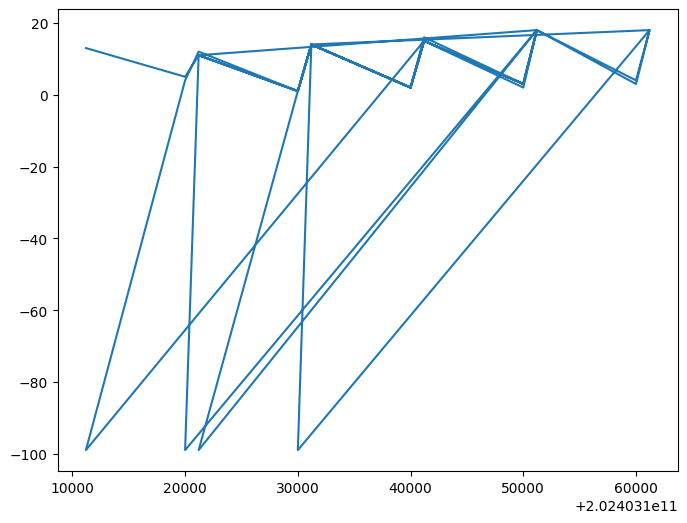

In [10]:
plt.figure(figsize=(8, 6))

plt.plot(text_dataFrame["TM_EF"][:50], text_dataFrame['TA'][:50], label='TA')